## Car4U Project

**Import all required libries**

In [1]:
# Import all necessary libries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Read in the Dataframe
df = pd.read_csv("used_cars_data-csv")
df.head(2)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,16.06,12.50


In [3]:
# Check the structure of the Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7078 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          7253 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(3), int64(3), object(8)
memory usage: 793.4+ KB


- The a above structure indicate we have 7253 rows/enterings in the dataset, we also have some problematic columns like "Mileage", "Engine", "Power", "seat" and "Price".

- From the outcome above we realise that some columns are been inputed as Object Datatype instead of Integers, Hence this needs to be corrected accordingly i.e. 'Mileage', 'Engine', 'Power' and 'Seat'

In [4]:
# Check for missing values
df.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price               0
Price                1234
dtype: int64

- From the analysis above, Columns like 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', and 'Owner_Type' have no missing values, suggesting a complete dataset in terms of basic vehicle information.
- Missing Data: The dataset has missing values in 'Mileage' (2 missing), 'Engine' (46 missing), 'Power' (175 missing), and 'Seats' (53 missing), indicating some vehicles lack specific details.
- Price Information: The 'Price' column, presumably indicating the selling price, has 1234 missing values, highlighting a significant portion of the dataset without price information. The 'New_Price' column is noted as having no missing values, but this may require verification due to the context suggesting it's unusual for used vehicle datasets to have complete new price data.

In [5]:
# Statistical summary of the dataset
df.describe(include= "all")

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
count,7253.000000,7253,7253,7253.000000,7.253000e+03,7253,7253,7253,7251,7207,7078,7200.000000,7253.000000,6019.000000
unique,NaN,2041,11,NaN,NaN,5,2,4,450,150,385,NaN,NaN,NaN
top,NaN,Mahindra XUV500 W8 2WD,Mumbai,NaN,NaN,Diesel,Manual,First,17.0 kmpl,1197 CC,74 bhp,NaN,NaN,NaN
freq,NaN,55,949,NaN,NaN,3852,5204,5952,207,732,280,NaN,NaN,NaN
mean,3626.000000,NaN,NaN,2013.365366,5.869906e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.279722,21.307322,9.479468
std,2093.905084,NaN,NaN,3.254421,8.442772e+04,NaN,NaN,NaN,NaN,NaN,NaN,0.811660,24.256314,11.187917
min,0.000000,NaN,NaN,1996.000000,1.710000e+02,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,3.910000,0.440000
25%,1813.000000,NaN,NaN,2011.000000,3.400000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,7.880000,3.500000
50%,3626.000000,NaN,NaN,2014.000000,5.341600e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,11.300000,5.640000
75%,5439.000000,NaN,NaN,2016.000000,7.300000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,21.690000,9.950000


- The summary provides statistical insights into a vehicle dataset with 7253 entries, detailing attributes such as Name, Location, Year, Kilometers Driven, Fuel Type, and Price, among others, with 'Diesel' and 'Manual' being the most common fuel type and transmission mode respectively. Key figures include a wide range of years (1996 to 2019), kilometers driven (up to 6.5 million), and prices (ranging from 0.44 to 160), indicating a diverse set of vehicle options from various locations and specifications.

In [6]:
# To check for duplicate rows
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7248    False
7249    False
7250    False
7251    False
7252    False
Length: 7253, dtype: bool

**No duplicate rows in the dataset**

### Working on the Fuel_Type column

In [7]:
# Checking the unique values in the 'Fuel_Type' column
df['Fuel_Type'].unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric'], dtype=object)

In [8]:
# Checking the unique values in the 'Seats' column
df['Seats'].unique()

#Observe we have 'nan' values that needs to be worked on befor converting the column form 'float' to 'int'

array([ 5.,  7.,  8.,  4.,  6.,  2., nan, 10.,  9.,  0.])

In [9]:
# We decide to replace all the nan values in the "Seats" Columns to 4 as i noticed most cars have 4 seats
df['Seats'] = df['Seats'].fillna(4).astype(int)
df["Seats"]

0       5
1       5
2       5
3       7
4       5
       ..
7248    5
7249    5
7250    5
7251    5
7252    5
Name: Seats, Length: 7253, dtype: int32

**We have successfully replace the nan values in and Seats column*.

In [10]:
# Check if the Seat columns as changed successfully to int and the unique feature too
df["Seats"].dtypes
df["Seats"].unique()


array([ 5,  7,  8,  4,  6,  2, 10,  9,  0])

- We have successfully changed the datatype and eliminate the nan values

### Working on Mileage column

In [11]:
# Check datatype of "Mileage"
df["Mileage"].dtypes

dtype('O')

In [12]:
# Convert the "Mileage" column from Object to Float
# Extract numeric part of the mileage using regular expressions
df['Mileage'] = df['Mileage'].astype(str).str.extract('([0-9.]+)').astype(float)


In [13]:
# Conver if we have successfully extract numeric value form the column
df["Mileage"].dtypes

dtype('float64')

In [14]:
# Just a quick review on the 'Mileage' columns
df['Mileage']

0       26.60
1       19.67
2       18.20
3       20.77
4       15.20
        ...  
7248    20.54
7249    17.21
7250    23.08
7251    17.20
7252    10.00
Name: Mileage, Length: 7253, dtype: float64

In [15]:
# Check for missing values
df['Mileage'].isna()

0       False
1       False
2       False
3       False
4       False
        ...  
7248    False
7249    False
7250    False
7251    False
7252    False
Name: Mileage, Length: 7253, dtype: bool

In [16]:
#check for the total nan values in the Mileage column
print(f"Total length of NaN value in Mileage Column :{df['Mileage'].isna().sum()}")
# We have a total of 2 missing values in the Mileage column that need to be fixed

Total length of NaN value in Mileage Column :2


In [17]:
# Get the mean
df["Mileage"].sum()/7253

18.136577967737487

In [18]:
# Get the rows with NaN values in the Mileage column
mileage = df[df.isna().any(axis=1)]
mileage

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
76,76,Ford Fiesta 1.4 SXi TDCi,Jaipur,2008,111111,Diesel,Manual,First,17.80,1399 CC,NaN,5,11.685,2.00
79,79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,0.00,1086 CC,NaN,5,4.550,1.30
89,89,Hyundai Santro Xing XO,Hyderabad,2007,73745,Petrol,Manual,First,17.00,1086 CC,NaN,5,4.550,2.10
120,120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17.00,1086 CC,NaN,5,4.550,0.85
143,143,Hyundai Santro Xing XO eRLX Euro II,Kochi,2008,80759,Petrol,Manual,Third,17.00,1086 CC,NaN,5,4.550,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598 CC,103.6 bhp,5,13.230,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197 CC,103.6 bhp,5,10.150,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461 CC,63.1 bhp,5,9.470,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197 CC,103.6 bhp,5,10.150,NaN


In [19]:
# Replace all missing values with the mean(18.14) 
df['Mileage'].replace(np.nan, 18.14, inplace=True)
df.query('Mileage == 18.14')

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4446,4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,18.14,72 CC,41 bhp,5,13.58,13.00
4904,4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,18.14,1798 CC,73 bhp,5,24.01,12.75


**We have successfully regularized all issues with the colum, No missing Values as seen above.**

### Regularizing the Enging Column

In [20]:
# To confirm the datatypes
# We have to convert the Data types to float
df["Engine"].dtypes

dtype('O')

In [21]:
# Convert the "Engine" column from Object to Float
# Extract numeric part of the mileage using regular expressions
df['Engine'] = df['Engine'].astype(str).str.extract('([0-9.]+)').astype(float)

In [22]:
df["Engine"]

0        998.0
1       1582.0
2       1199.0
3       1248.0
4       1968.0
         ...  
7248    1598.0
7249    1197.0
7250    1461.0
7251    1197.0
7252    2148.0
Name: Engine, Length: 7253, dtype: float64

In [23]:
#check for the total nan values in the Engine column
print(f"Total length of NaN value in Engine Column :{df['Engine'].isna().sum()}")
# We have a total of 46 missing values in the Engine column that need to be fixed

Total length of NaN value in Engine Column :46


**Since they are negligible i decide to replace all values the mean** 

In [24]:
# Get the rows with NaN values in the Engine column
engine_nan = df[df.isna().any(axis=1)]
engine_nan

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
76,76,Ford Fiesta 1.4 SXi TDCi,Jaipur,2008,111111,Diesel,Manual,First,17.80,1399.0,NaN,5,11.685,2.00
79,79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,0.00,1086.0,NaN,5,4.550,1.30
89,89,Hyundai Santro Xing XO,Hyderabad,2007,73745,Petrol,Manual,First,17.00,1086.0,NaN,5,4.550,2.10
120,120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17.00,1086.0,NaN,5,4.550,0.85
143,143,Hyundai Santro Xing XO eRLX Euro II,Kochi,2008,80759,Petrol,Manual,Third,17.00,1086.0,NaN,5,4.550,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.6 bhp,5,13.230,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.6 bhp,5,10.150,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.1 bhp,5,9.470,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.6 bhp,5,10.150,NaN


In [25]:
# Replace all missing values with the mean(1606.32) 
df['Engine'].replace(np.nan, 1606.32, inplace=True)
df.query('Engine == 1606.32')

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
194,194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.00,1606.32,NaN,4,13.580,2.95
208,208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.10,1606.32,NaN,4,7.880,2.11
733,733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.10,1606.32,NaN,4,7.880,1.75
749,749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,0.00,1606.32,NaN,4,120.000,26.50
1294,1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,12.80,1606.32,NaN,4,13.580,3.20
1327,1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.10,1606.32,NaN,4,7.880,5.80
1385,1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,0.00,1606.32,NaN,4,13.580,1.50
1460,1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,0.00,1606.32,NaN,4,120.000,40.88
2074,2074,Maruti Swift 1.3 LXI,Pune,2011,24255,Petrol,Manual,First,16.10,1606.32,NaN,4,7.880,3.15
2096,2096,Hyundai Santro LP zipPlus,Coimbatore,2004,52146,Petrol,Manual,First,0.00,1606.32,NaN,4,4.550,1.93


**We have successfully changed the datatype and no missing value observed.**

### Regularizing the Power column

In [26]:
# Confirm the datatype
df["Power"].dtypes

dtype('O')

In [27]:
# Convert the "Power" Datatype to float as supposed
# Extract numeric part of the mileage using regular expressions
df['Power'] = df['Power'].astype(str).str.extract('([0-9.]+)').astype(float)

In [28]:
# Confirm if the datatype as changed
df["Power"].dtypes

dtype('float64')

In [29]:
# Check for missingg values
df["Power"].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7248    False
7249    False
7250    False
7251    False
7252    False
Name: Power, Length: 7253, dtype: bool

In [30]:
#check for the total nan values in the Power column
df.query("Power.isna()")
#check for the total nan values in the Power column
print(f"Total length of NaN value in Power Column :{df['Power'].isna().sum()}")

Total length of NaN value in Power Column :175


In [31]:
# Get the rows with NaN values in the Power colum
power_nan = df[df.isna().any(axis=1)]
power_nan

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
76,76,Ford Fiesta 1.4 SXi TDCi,Jaipur,2008,111111,Diesel,Manual,First,17.80,1399.0,NaN,5,11.685,2.00
79,79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,0.00,1086.0,NaN,5,4.550,1.30
89,89,Hyundai Santro Xing XO,Hyderabad,2007,73745,Petrol,Manual,First,17.00,1086.0,NaN,5,4.550,2.10
120,120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17.00,1086.0,NaN,5,4.550,0.85
143,143,Hyundai Santro Xing XO eRLX Euro II,Kochi,2008,80759,Petrol,Manual,Third,17.00,1086.0,NaN,5,4.550,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.6,5,13.230,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.6,5,10.150,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.1,5,9.470,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.6,5,10.150,NaN


In [32]:
# Get the mean of the Power column and then replace the miss values with the mean
df["Power"].sum()/ 7253

110.04442092927064

In [33]:
# Replace all missing values with the mean obtained above (110.04)
df['Power'].replace(np.nan, 110.04, inplace=True)
df.query('Power == 110.04')

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
76,76,Ford Fiesta 1.4 SXi TDCi,Jaipur,2008,111111,Diesel,Manual,First,17.80,1399.00,110.04,5,11.685,2.00
79,79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,0.00,1086.00,110.04,5,4.550,1.30
89,89,Hyundai Santro Xing XO,Hyderabad,2007,73745,Petrol,Manual,First,17.00,1086.00,110.04,5,4.550,2.10
120,120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17.00,1086.00,110.04,5,4.550,0.85
143,143,Hyundai Santro Xing XO eRLX Euro II,Kochi,2008,80759,Petrol,Manual,Third,17.00,1086.00,110.04,5,4.550,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6896,6896,Toyota Etios Liva GD,Hyderabad,2013,86000,Diesel,Manual,First,23.59,1364.00,110.04,5,8.525,NaN
6902,6902,Toyota Etios Liva V,Kochi,2012,59311,Petrol,Manual,First,18.30,1606.32,110.04,4,8.525,NaN
6947,6947,Toyota Etios Liva G,Delhi,2012,77800,Petrol,Manual,First,18.30,1197.00,110.04,5,8.525,NaN
7092,7092,Hyundai Santro Xing XG AT eRLX Euro III,Coimbatore,2007,64168,Petrol,Automatic,First,17.00,1086.00,110.04,5,4.550,NaN


**We have successfully changed the datatype in "Power" column and no missing value observed.**

### Regularizing the "Price" column

In [34]:
df.query("Price.isna()")
#check for the total nan values in the Price column
print(f"Total length of NaN value in Price Column :{df['Price'].isna().sum()}")

Total length of NaN value in Price Column :1234


**To fix the problematic rows with NaN values, i have decided to use mean of the price column to fill all NaN values**

In [35]:
# Get the mean of the "price" column.
df['Price'].sum() / 7235

7.886236351071181

In [36]:
# Replace all NaN in the price column with the mean (7.89)
df['Price'].replace(np.nan, 7.89, inplace=True)
df.query('Price == 7.89')

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2117,2117,Maruti Baleno Delta Automatic,Kochi,2018,21684,Petrol,Automatic,First,21.40,1197.0,83.10,5,8.800,7.89
6019,6019,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26,998.0,58.20,4,4.360,7.89
6020,6020,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.70,796.0,47.30,5,4.360,7.89
6021,6021,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393.0,147.80,7,25.270,7.89
6022,6022,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59,1364.0,110.04,5,8.525,7.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.60,5,13.230,7.89
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.60,5,10.150,7.89
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.10,5,9.470,7.89
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.60,5,10.150,7.89


In [37]:
# loop and prints the total number of empty strings or space for each column
for column in df.columns:
    empty_count = len(df.query(f'`{column}` == " "'))
    print(f"Total number of empty strings or spaces in {column} column: {empty_count}")

Total number of empty strings or spaces in S.No. column: 0
Total number of empty strings or spaces in Name column: 0
Total number of empty strings or spaces in Location column: 0
Total number of empty strings or spaces in Year column: 0
Total number of empty strings or spaces in Kilometers_Driven column: 0
Total number of empty strings or spaces in Fuel_Type column: 0
Total number of empty strings or spaces in Transmission column: 0
Total number of empty strings or spaces in Owner_Type column: 0
Total number of empty strings or spaces in Mileage column: 0
Total number of empty strings or spaces in Engine column: 0
Total number of empty strings or spaces in Power column: 0
Total number of empty strings or spaces in Seats column: 0
Total number of empty strings or spaces in New_Price column: 0
Total number of empty strings or spaces in Price column: 0


In [38]:
# loop and prints the total number of empty strings or space for each column
for column in df.columns:
    empty_count = len(df.query(f'`{column}` == "NaN"'))
    print(f"Total number of Nan Value in {column} column: {empty_count}")

Total number of Nan Value in S.No. column: 0
Total number of Nan Value in Name column: 0
Total number of Nan Value in Location column: 0
Total number of Nan Value in Year column: 0
Total number of Nan Value in Kilometers_Driven column: 0
Total number of Nan Value in Fuel_Type column: 0
Total number of Nan Value in Transmission column: 0
Total number of Nan Value in Owner_Type column: 0
Total number of Nan Value in Mileage column: 0
Total number of Nan Value in Engine column: 0
Total number of Nan Value in Power column: 0
Total number of Nan Value in Seats column: 0
Total number of Nan Value in New_Price column: 0
Total number of Nan Value in Price column: 0


## Data Visualization

#### Exploratory Data Analysis
- Plot the distribution plots for all the numerical features and list your observations.

C:\Users\Bukola Ayeni\AppData\Local\Temp\ipykernel_18708\364824779.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Bukola Ayeni\AppData\Local\Temp\ipykernel_18708\364824779.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Bukola Ayeni\AppData\Local\Temp\ipykernel_18708\364824779.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Bukola Ayeni\AppData\Local\Temp\ipykernel_18708\364824779.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Bukola Ayeni\AppData\Local\Temp\ipykernel_18708\364824779.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Bukola Ayeni\AppData\Local\Temp\ipykernel_18708\364824779.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Bukola Ayeni\AppData\Local\Temp\ipykernel_18708\364824779.py:13: UserWarning: The figure layout has changed t

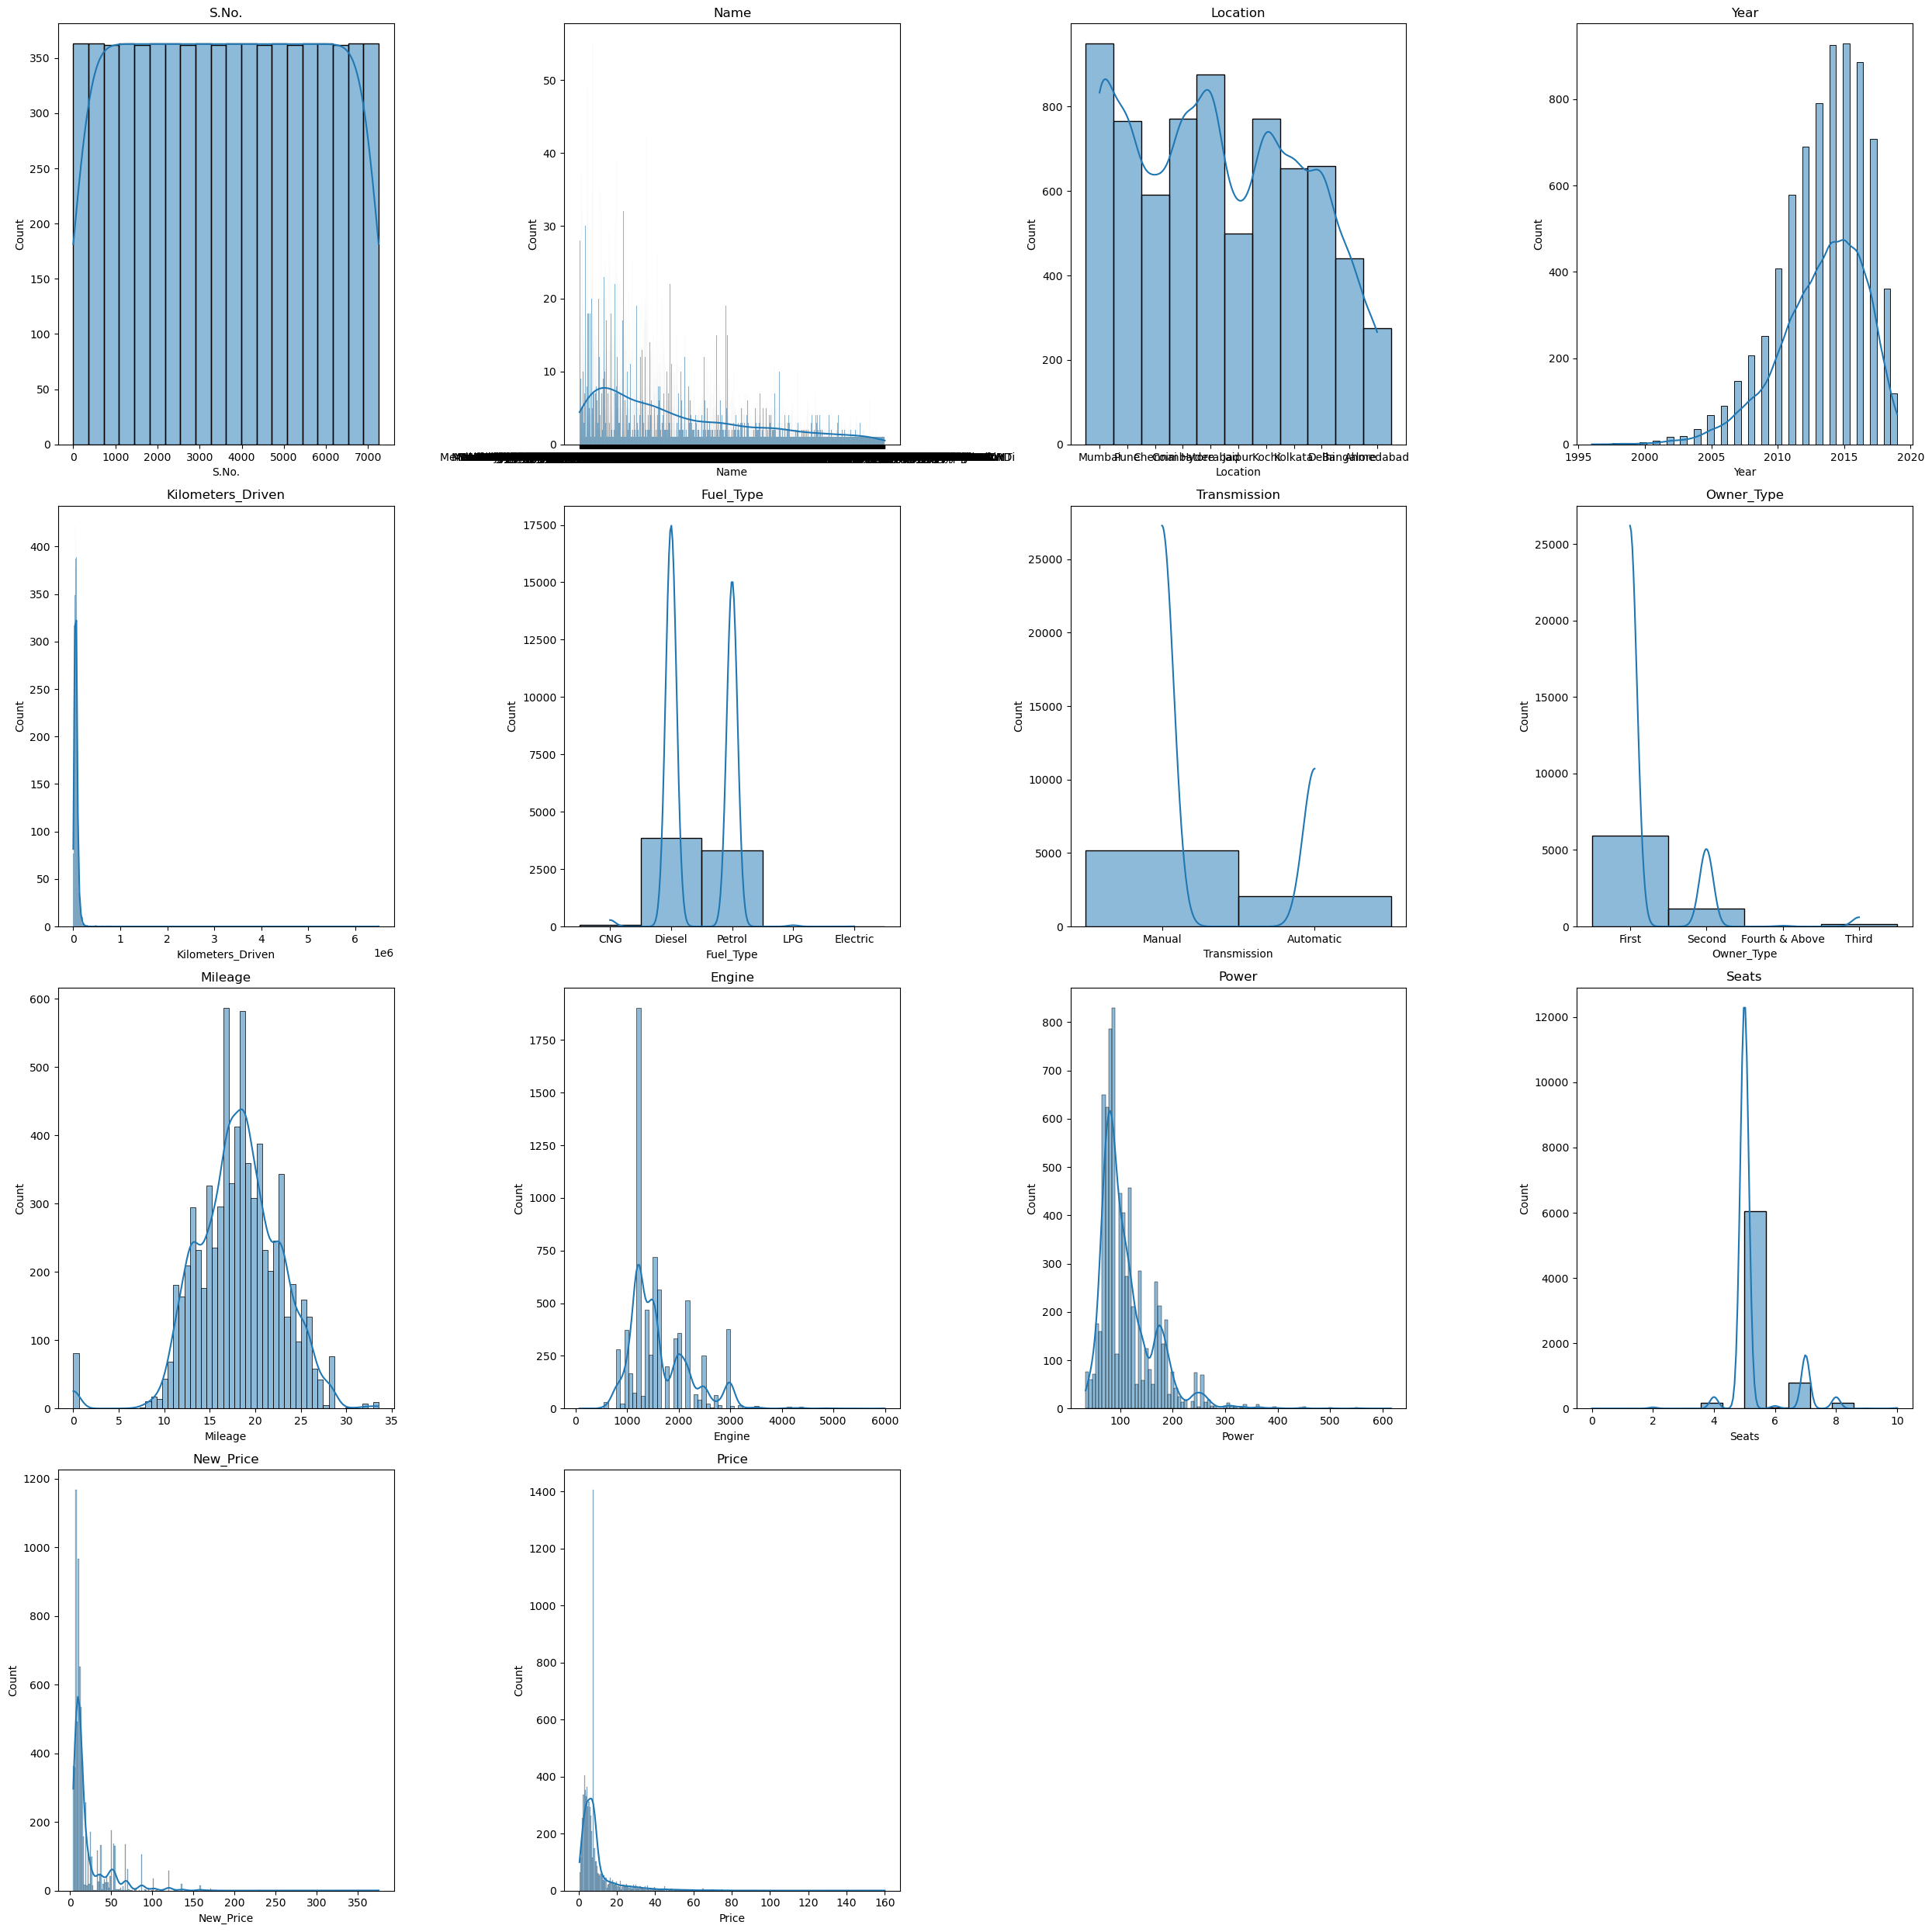

In [39]:
# plot the distribution for all the numerical features in our dataset
# Adding the target variable (Price)
target=df['Price']

# Setting up the matplotlib figure for the distribution plots
plt.figure(figsize=(25, 25))

# Looping through all the columns and plotting distribution plots
for i, col in enumerate(df.columns):
    plt.subplot(4, 4, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.tight_layout()

plt.show()

- The provided image is the collection of histograms representing the distribution of various vehicle attributes, such as serial numbers, names, locations, model years, kilometers driven, fuel types, transmission types, ownership types, mileage, engine sizes, power outputs, seat counts, new prices, and resale prices, reflecting diverse characteristics of a vehicle dataset.

In [40]:
# We observe that the Target variable (Price) is not normally distributed as seen in the above plot.
df["log_Price"]= np.log(df["Price"])

In [41]:
# View the first few rows
df.head(2)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,log_Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5,5.51,1.75,0.559616
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5,16.06,12.50,2.525729


**Plot a scatterplot for feature and vairable**

<Axes: xlabel='Year', ylabel='log_Price'>

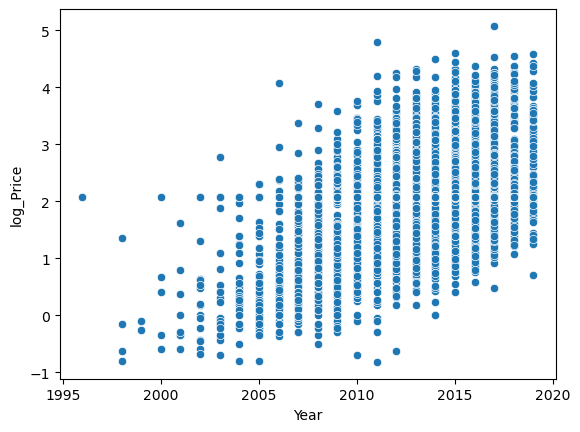

In [42]:
# Plotting scatterplots for features and target vatiable
sns.scatterplot(df, x = "Year",
y = "log_Price")


<Axes: xlabel='Kilometers_Driven', ylabel='log_Price'>

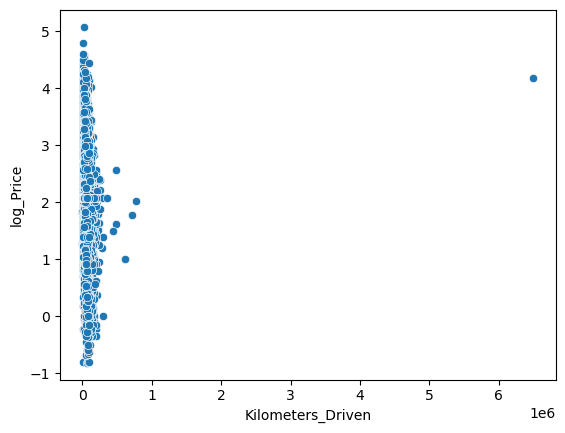

In [43]:
sns.scatterplot(df, x = "Kilometers_Driven",
y = "log_Price")

<Axes: xlabel='Fuel_Type', ylabel='log_Price'>

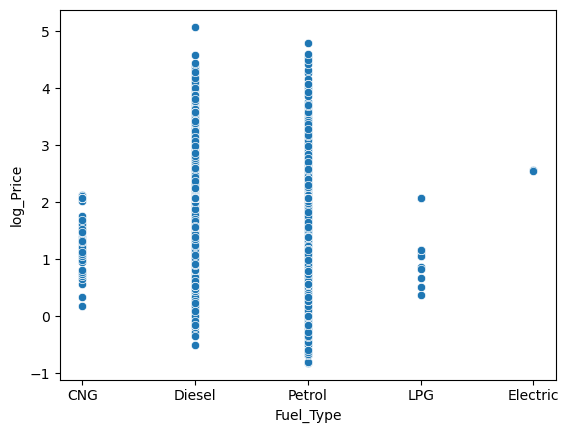

In [44]:

sns.scatterplot(df, x = "Fuel_Type",
y = "log_Price")

<Axes: xlabel='Transmission', ylabel='log_Price'>

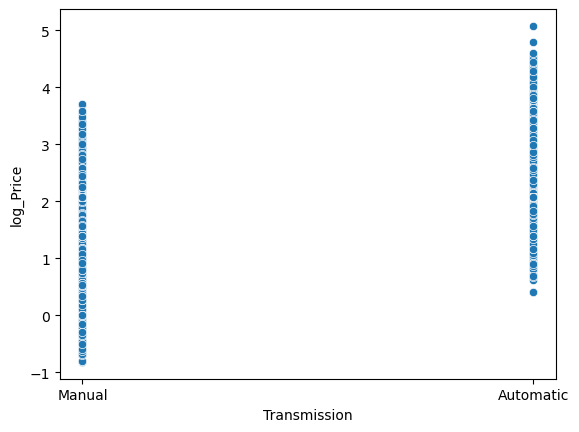

In [45]:
sns.scatterplot(df, x = "Transmission",
y = "log_Price")

<Axes: xlabel='Owner_Type', ylabel='log_Price'>

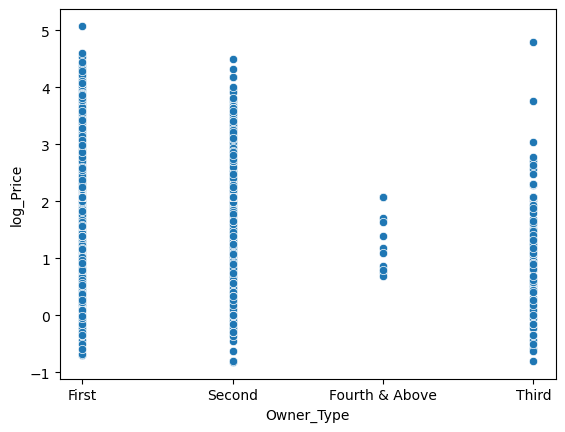

In [46]:
sns.scatterplot(df, x = "Owner_Type",
y = "log_Price")

<Axes: xlabel='Mileage', ylabel='log_Price'>

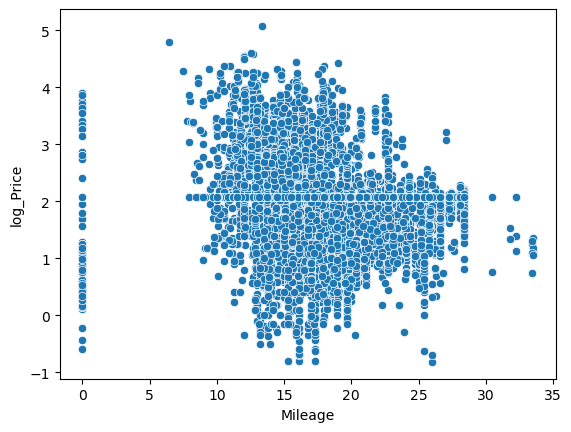

In [47]:
sns.scatterplot(df, x = "Mileage",
y = "log_Price")

<Axes: xlabel='Engine', ylabel='log_Price'>

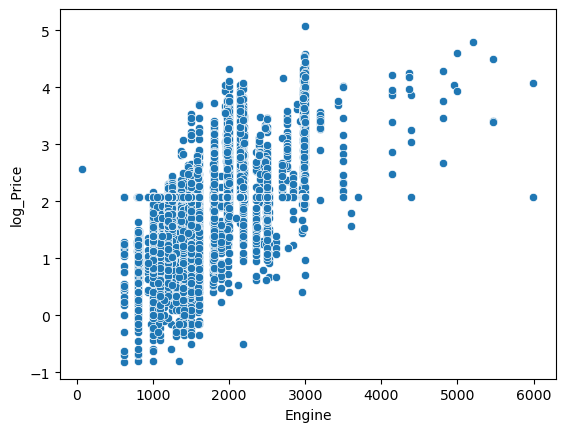

In [48]:
sns.scatterplot(df, x = "Engine",
y = "log_Price")

<Axes: xlabel='Power', ylabel='log_Price'>

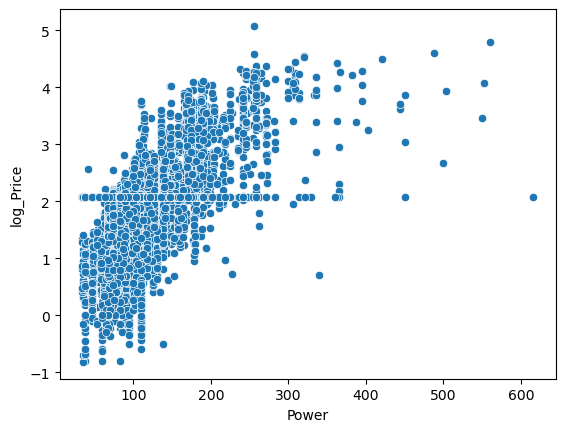

In [49]:
sns.scatterplot(df, x = "Power",
y = "log_Price")

<Axes: xlabel='Seats', ylabel='log_Price'>

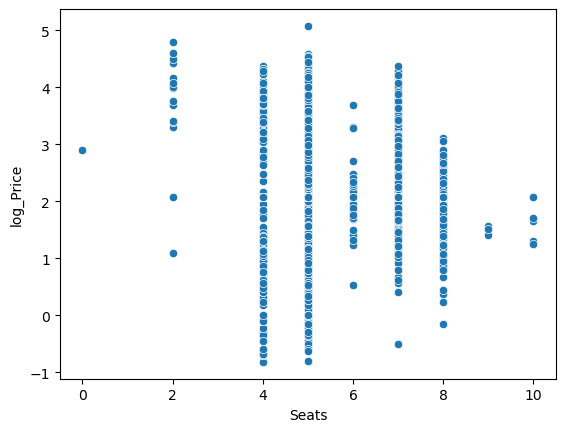

In [50]:
sns.scatterplot(df, x = "Seats",
y = "log_Price")

<Axes: xlabel='New_Price', ylabel='log_Price'>

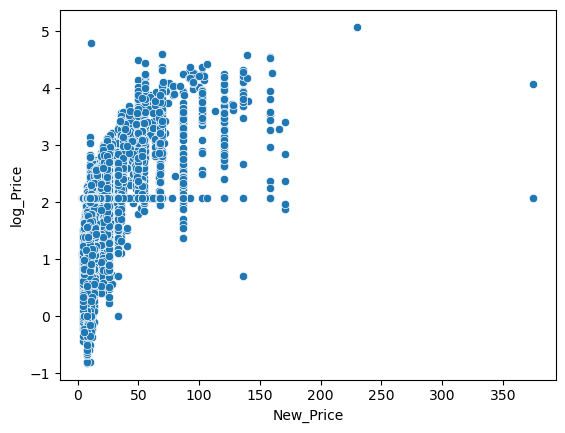

In [51]:
sns.scatterplot(df, x = "New_Price",
y = "log_Price")

#### Plot a correlation Heatmap to view the correlation beween the feature

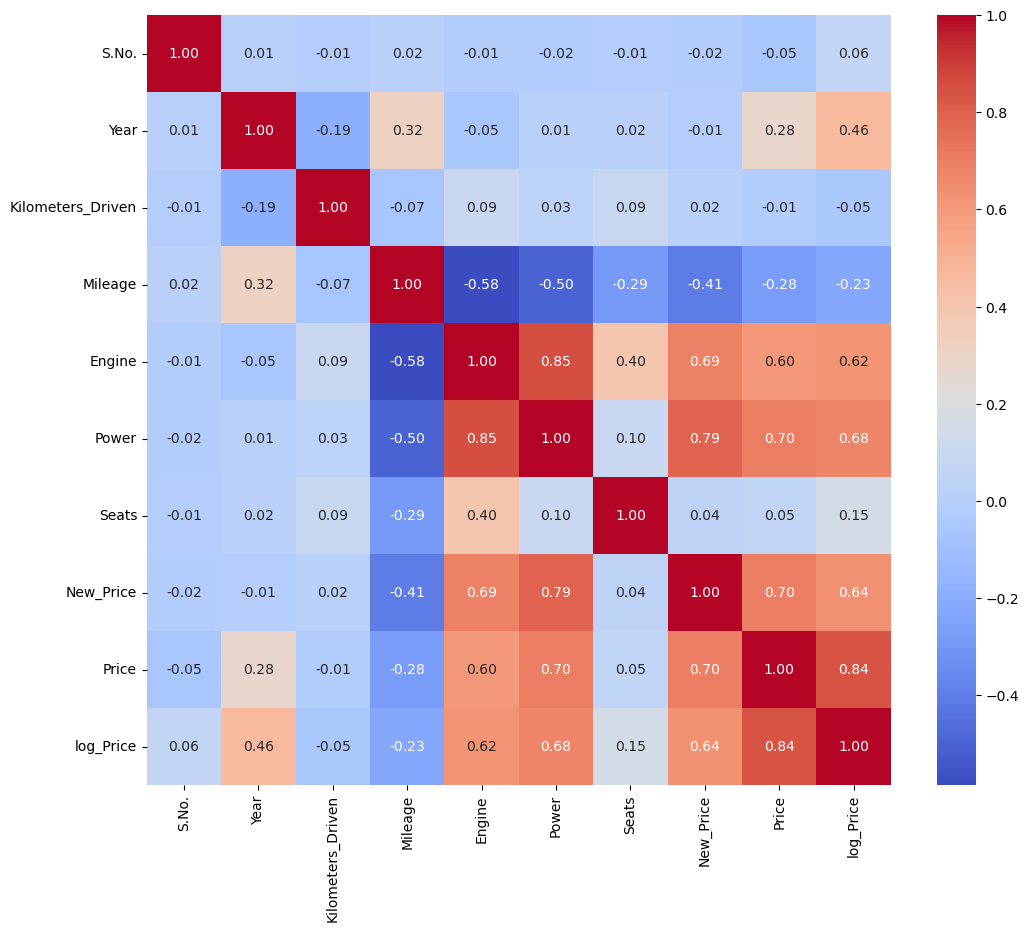

In [52]:
# Calculate correlation matrix between all columns in the data frame
# Use heatmap function to visualise the matrix
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Set up the matplotlib figure with a larger size
plt.figure(figsize=(12, 10))  

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')

# Show the plot
plt.show()



#### The heatmap visualizes the correlation matrix of various vehicle attributes. This shows strong positive correlations between 'Engine' and 'Power' (0.85), 'New_Price' and 'Log_price' (0.64), as well as 'New_Price' and 'Power' (0.84), which is expected as the logarithmic price should closely track the actual price. Also, there's a  negative correlation between 'Mileage' and 'Engine' (-0.58), and 'Mileage' and 'Power' (-0.50), suggesting that as engine size and power increase, fuel efficiency decreases. Correlations close to 0 indicate no linear relationship, such as 'Year' with 'S.No.' and 'Kilometers_Driven' with 'Mileage'. 







<Axes: xlabel='log_Price', ylabel='Count'>

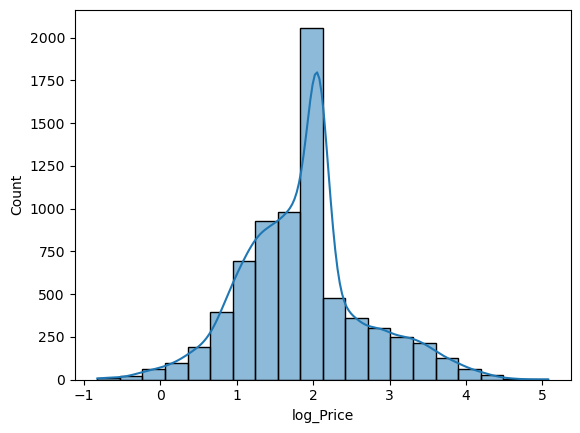

In [53]:
# Plot the histogram to help visualize the price of a car
sns.histplot(df["log_Price"], bins = 20, kde = True)

- The above Histogram indicate the Target is not normally distributed

**Split the dataset into dependent and independant variables**

In [54]:
# Split the data into dependant and independant variables
from sklearn.model_selection import train_test_split

#features = df[["Year", "Kilometers_Driven", "Mileage", "Engine", "Power", "seat","New_Price" ]]
features = ["Power", "Engine" , "Mileage", "New_Price", "Year"]
x = df[features]
y = df["log_Price"]


In [55]:
# Split the data into training and testing with ratio 70:30
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state= 2)

In [56]:
# Check the dimension of the train and test in the data sext
print(f"Training shape: {x_train.shape}")
print(f"Testing shape: {y_train.shape}")

Training shape: (5802, 5)
Testing shape: (5802,)


In [57]:
#let's drop the non-numeric columns
#x_numeric = x.select_dtypes(include=[np.number])


# Proceed with scaling
scaler = MinMaxScaler()
scaler.fit(x)

# Transform your data
x_train_scaled = scaler.transform(x_train.select_dtypes(include=[np.number]))
x_test_scaled = scaler.transform(x_test.select_dtypes(include=[np.number]))

In [58]:
# # Nornmalisation

# # Apply MinMinMaxScaler by scaling the input feature to have mean =0 and std =1
from sklearn.preprocessing import MinMaxScaler
# # Create a instance
scaler = MinMaxScaler()
# # Fit the the scale to the feature dataset
scaler.fit(x)
# # Transform the train and test dataset
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

### Model Building

In [59]:
# Create an instance of the model and fit to the training data
model = LinearRegression()
model.fit(x_train_scaled, y_train)


LinearRegression()

In [60]:
# Get the gredient and intercept

gradient = model.coef_[0] 
intercept = model.intercept_
print("gradient: ", gradient) 
print("intercept: ", intercept)


gradient:  2.368404150819735
intercept:  -1.1231844858579754


In [61]:
# Calculate the predicted outcome from the Test dataset
price_predict = model.predict(x_test_scaled)

#show the Price_pred
price_predict

array([1.91766176, 1.48075171, 1.31312049, ..., 2.83308056, 1.92456897,
       1.53544928])

In [62]:
# Comparing the actual price and the predicted price of a second-hand car

df_check = pd.DataFrame({'True Values': y_test, 'Predicted Values': price_predict})

df_check

,True Values,Predicted Values
4584,1.893112,1.917662
6505,2.065596,1.480752
3675,1.360977,1.313120
5654,1.566530,1.588522
4297,2.602690,2.672397
...,...,...
2937,2.904165,2.910889
6549,2.065596,1.430320
1908,2.740840,2.833081
2269,1.731656,1.924569


- The table highlights specific instances of the comparisons between the actual and predicted values, This indicating the model's performance in predicting prices.

In [63]:
# Get the test prediction
test_predict = model.predict(x_test_scaled)

print(test_predict)
print(y_test)
print(test_predict.mean())
y_test.mean()

[1.91766176 1.48075171 1.31312049 ... 2.83308056 1.92456897 1.53544928]
4584    1.893112
6505    2.065596
3675    1.360977
5654    1.566530
4297    2.602690
          ...   
2937    2.904165
6549    2.065596
1908    2.740840
2269    1.731656
5332    1.458615
Name: log_Price, Length: 1451, dtype: float64
1.8384587641887866


1.8161891614146726

In [64]:
# Get the Intercept
model.intercept_

-1.1231844858579754

In [65]:
# Get the Coefficent
model.coef_

array([ 2.36840415,  1.96658079, -0.02065192,  3.19275798,  2.67945231])

In [66]:
# Get the Evaluation matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
mae = mean_absolute_error(y_test,test_predict)
mse = mean_squared_error(y_test, test_predict)
rmse = np.sqrt(mse)
R2 = r2_score(y_test, test_predict)


In [67]:
# Get the standard deviation error
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 0.4405988178776122


In [68]:
# to get the average magniture of error in a set of predictions
print(f'Mean Absolute Error (MAE): {mae}')

Mean Absolute Error (MAE): 0.3122634165403128


In [69]:
# Get the average squared difference between the estimated values and the actual values
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 0.19412731831514926


In [70]:
# To get the percentage of predictable dependant variable from the independant
print(f'R Squared (R2): {R2}')

R Squared (R2): 0.6739468736654335


In [71]:
# Write a funtion on R-Squared score

def model_performance_regression(model, predictors, target):
    # Fit the model
    model.fit(predictors, target)
    
    # Make predictions
    predictions = model.predict(predictors)
    
    # Calculate RMSE, MAE, R-squared, and adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, predictions))
    mae = mean_absolute_error(target, predictions)
    r2 = r2_score(target, predictions)
    n = len(target)
    p = len(predictors[0])
    adjr2 = 1 - ((1 - r2) * ((n - 1) / (n - p - 1)))
    
    # Creating a dataframe of metrics
    df_perf = pd.DataFrame({"RMSE": [rmse], "MAE": [mae], "R2-squared": [r2], "Adj.R_squared": [adjr2]})
    
    return df_perf

In [72]:
result_train = model_performance_regression(model, x_train_scaled, y_train)

In [73]:
# To get the scores on test set
result_train

,RMSE,MAE,R2-squared,Adj.R_squared
0,0.425749,0.31174,0.722398,0.722158


- This model demonstrates a good level of prediction accuracy, as indicated by a relatively high R-squared value of 0.722, meaning approximately 72.2% of the variance in the dependent variable is explained by the model. The RMSE and MAE are fairly low at 0.426 and 0.312 respectively, suggesting that on average, the model's predictions deviate from the actual values by these amounts, with RMSE giving more weight to larger errors due to the squaring of the residuals. The Adjusted R-squared being very close to the R-squared value indicates that the number of predictors in the model is appropriate for the size of the dataset.